### <span style="color:red"> Project: Predicting House Prices </span>

### <span style="color:green"> Presented By: Oluwatimileyin Victor Adedigba </span>

> ### Abstract

This notebook presents a machine learning project on predicting house prices based on a dataset of housing features. The notebook contains the following sections:

- Data Preparation and Exploration: This section shows how to load, clean, and explore the dataset using Python and Pandas. It also shows how to select the most relevant features for the prediction task using correlation analysis and a custom function.
- Model Preparation and Deployment: This section shows how to create a pipeline that preprocesses the features and fits a histogram-based gradient boosting regressor to the training data.
- Evaluation:  It also shows how to make predictions on the validation set and evaluate the model performance using root mean squared logarithmic error (RMSLE). At the end the RMSLE was seen to be 0.2 which shows the whole process was perfomed optimally without overfitting


Importing the required Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector


Loading Data

In [3]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 1 Data Preparation and Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


After Loading the data, I want to select the best of features to train my model

In [7]:
# I will separate the input and output variables
X = train.iloc[:, :-1] # all columns except the last one
y = train.iloc[:, -1] # the last column

def correlate_features(X, y):
    # checking if X and y are pandas dataframes or series
    if not isinstance(X, (pd.DataFrame, pd.Series)):
        # converting X to a dataframe using pd.DataFrame()
        X = pd.DataFrame(X)
    if not isinstance(y, (pd.Series)):
        # converting y to a series using pd.Series()
        y = pd.Series(y)

    # creating an empty list to store the correlation coefficients
    corr_list = []

    # looping through each column in X
    for col in X.columns:
        #  checking if the column values are numeric using np.issubdtype
        if np.issubdtype(X[col].dtype, np.number):
            # What I am doing here is calculating the correlation coefficient using np.corrcoef
            corr = np.corrcoef(X[col], y)[0, 1]
            # appending the column name and the correlation coefficient to the list
            corr_list.append((col, corr))
        else:
            # What I am doing here is skipping the column and printing a message
            print(f"{col} is not numeric, so no correlation is performed")

    # converting the list into a dataframe using pd.DataFrame()
    corr_df = pd.DataFrame(corr_list, columns=['Feature', 'Correlation'])

    # sorting the dataframe by the correlation coefficient in descending order using sort_values()
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)

    # returning the dataframe
    return corr_df

# applying the function to X and y
corr_table = correlate_features(X, y)

corr_table


MSZoning is not numeric, so no correlation is performed
Street is not numeric, so no correlation is performed
Alley is not numeric, so no correlation is performed
LotShape is not numeric, so no correlation is performed
LandContour is not numeric, so no correlation is performed
Utilities is not numeric, so no correlation is performed
LotConfig is not numeric, so no correlation is performed
LandSlope is not numeric, so no correlation is performed
Neighborhood is not numeric, so no correlation is performed
Condition1 is not numeric, so no correlation is performed
Condition2 is not numeric, so no correlation is performed
BldgType is not numeric, so no correlation is performed
HouseStyle is not numeric, so no correlation is performed
RoofStyle is not numeric, so no correlation is performed
RoofMatl is not numeric, so no correlation is performed
Exterior1st is not numeric, so no correlation is performed
Exterior2nd is not numeric, so no correlation is performed
MasVnrType is not numeric, so 

,Feature,Correlation
4,OverallQual,0.790982
16,GrLivArea,0.708624
26,GarageCars,0.640409
27,GarageArea,0.623431
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101


I will be isolting top top eight that are not correlated with  eachother for the continuous features and two categorical variables. To acheieve this I will follow the following steps:

In [21]:
# Define a function that takes a dataframe and a number of pairs as arguments
def find_correlated_pairs(df, n):
    # Drop the target variable from the dataframe
    df = train.drop(['SalePrice', 'Id'], axis=1)    #note train is name of data set and 'SalePrice' is target name

    # Calculate the pairwise correlation matrix of the features
    corr_matrix = df.corr()

    # Unstack the matrix and drop the redundant pairs
    corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()

    # Sort the pairs by the absolute value of the correlation coefficient
    corr_pairs = corr_pairs.sort_values(key=lambda x: abs(x))

    # Select the n pairs with the lowest correlation coefficient
    least_correlated = corr_pairs.head(n)

    # Select the n pairs with the highest correlation coefficient
    best_correlated = corr_pairs.tail(n)

    # Return the least and best correlated pairs as dataframes
    return least_correlated.to_frame('Correlation'), best_correlated.to_frame('Correlation')

# Load the dataset that contains the features and the target variable
# For example, let's use a csv file called "train.csv"
# train = pd.read_csv("train.csv")

# Select the features that are in corr_table using .loc[]
# For example, let's assume that corr_table is a pandas dataframe with one column: 'Feature'
features = train.loc[:, corr_table['Feature']]

# Apply the function to the selected features with 3 pairs as an argument
least_corr, best_corr = find_correlated_pairs(features, 15)

# Print or display the results
print("Least correlated pairs:")
print(least_corr)
print()
print("Best correlated pairs:")
print(best_corr)



Least correlated pairs:
                            Correlation
BsmtFullBath 3SsnPorch        -0.000106
TotalBsmtSF  BsmtHalfBath     -0.000315
3SsnPorch    MiscVal           0.000354
LowQualFinSF FullBath         -0.000710
GarageYrBlt  YrSold           -0.001014
LotArea      MoSold            0.001205
HalfBath     MiscVal           0.001290
Fireplaces   MiscVal           0.001409
1stFlrSF     BsmtHalfBath      0.001956
OverallCond  PoolArea         -0.001985
MSSubClass   BsmtHalfBath     -0.002333
GrLivArea    MiscVal          -0.002416
BsmtUnfSF    EnclosedPorch    -0.002538
LotArea      BsmtUnfSF        -0.002618
BsmtFinSF2   OpenPorchSF       0.003093

Best correlated pairs:
                           Correlation
GarageYrBlt  GarageCars       0.588920
YearBuilt    YearRemodAdd     0.592855
OverallQual  GrLivArea        0.593007
             GarageCars       0.600671
2ndFlrSF     HalfBath         0.609707
             TotRmsAbvGrd     0.616423
GrLivArea    FullBath         0.630012


<ipython-input-21-7e9dd0aaa0ec>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Based on the above sortuings, my selected features will be:

In [22]:
#Train data
X_train = train[['Id', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BedroomAbvGr',
                 'KitchenAbvGr', 'GarageArea',
                 '1stFlrSF', 'MSZoning', 'Heating']]

y_train = train['SalePrice']

Visualizing the correlations of these features

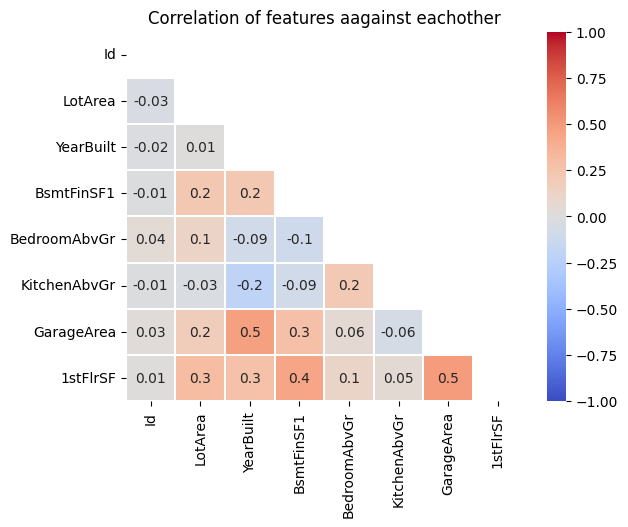

In [37]:
correlation_matrix = X_train.corr(numeric_only=True)
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True # Mask to keep only one half of the symetrical matrix
sns.heatmap(correlation_matrix,
              vmin = -1,
              vmax = 1,
              cmap = 'coolwarm',
              mask = mask,
              linewidths = 0.1,
              annot=True,
              fmt= '.1g',)
plt.title('Correlation of features aagainst eachother')
plt.show()

To select the same features from test data

In [24]:
#Test data
X_test = test[['LotArea', 'YearBuilt',
                 'BsmtFinSF1', 'BedroomAbvGr',
                 'KitchenAbvGr', 'GarageArea',
                 '1stFlrSF', 'MSZoning', 'Heating']]

y_test = test[['SaleCondition']]

Checking for missing data

In [23]:
X_train.isnull().sum()

Id              0
LotArea         0
YearBuilt       0
BsmtFinSF1      0
BedroomAbvGr    0
KitchenAbvGr    0
GarageArea      0
1stFlrSF        0
MSZoning        0
Heating         0
dtype: int64

# 2 Model Preparation and Deployment

Splitting categorical variables for encoding

In [25]:
Xtrain = X_train.drop(['MSZoning', 'Heating'], axis = 1)

Checking for duplicates

In [ ]:
Xtrain.duplicated().sum()

0

In [27]:
Xtrain

,Id,LotArea,YearBuilt,BsmtFinSF1,BedroomAbvGr,KitchenAbvGr,GarageArea,1stFlrSF
0,1,8450,2003,706,3,1,548,856
1,2,9600,1976,978,3,1,460,1262
2,3,11250,2001,486,3,1,608,920
3,4,9550,1915,216,3,1,642,961
4,5,14260,2000,655,4,1,836,1145
...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,0,3,1,460,953
1456,1457,13175,1978,790,3,1,500,2073
1457,1458,9042,1941,275,4,1,252,1188
1458,1459,9717,1950,49,2,1,240,1078


In [28]:
# Defining the preprocessing steps for continuous and categorical features
numeric_features = ['Id', 'LotArea', 'YearBuilt',
                 'BsmtFinSF1', 'BedroomAbvGr',
                    'KitchenAbvGr', 'GarageArea','1stFlrSF']
categorical_features = ['MSZoning', 'Heating']

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # To Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())  # Encoding the categorical features
])

# Combining the transformers for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [31]:
# Creating the full modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor())
])


In [32]:
# Fitting the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'LotArea', 'YearBuilt',
                                                   'BsmtFinSF1', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'GarageArea',
                                                   '1stFlrSF']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['MSZoning', 'Heating'])])),
                ('regressor', HistGradientBoostingRegressor())])

In [33]:
# Making predictions on the test set
y_pred = model.predict(X_val)

# 3 Evaluation

In [34]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [35]:
compute_rmsle(y_val, y_pred)

0.2